In [2]:
import pandas as pd

df = pd.read_csv('무신사_하의(전처리).csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,순위,상품명,브랜드,평점,구매후기 개수,좋아요 수,누적판매량,조회수
0,1.000000,깡스타일리스트 X 플랙 스티즈 K45 미드 블루,플랙,4.9,669,2379,2500,70000
1,0.999778,깡스타일리스트 X 플랙 스티즈 K46 로우,플랙,4.9,667,3149,2600,87000
2,0.999555,[빅유니온x깡스타일리스트] PLEATED CARGO PANTS / OLIVE,빅유니온,4.9,29,3128,5000,100000
3,0.999333,[빅유니온x깡스타일리스트] PLEATED CARGO PANTS / BLACK,빅유니온,4.8,85,2715,4700,107000
4,0.999111,깡스타일리스트 X 플랙 베를린 K47 딥 블루,플랙,4.9,330,1247,1400,44000
...,...,...,...,...,...,...,...,...
4495,0.000889,미라지 와이드 데님,논플로어,5.0,4,41,0,0
4496,0.000667,서포트시리즈 트랙팬츠 그레이,톰스벌스데이,0.0,0,26,0,0
4497,0.000445,스케이트보딩 SST 트랙 팬츠 (젠더 뉴트럴) HK9854,아디다스,0.0,0,65,0,600
4498,0.000222,플러 루즈핏 트레이닝 반바지 블랙,필립페이커,0.0,0,44,0,100


In [3]:
df.to_csv('하의데이터_최종.csv')

# 종속변수 = '순위'

In [4]:
X = df[['평점', '조회수', '누적판매량', '구매후기 개수','좋아요 수']]
y = df['순위']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print('MSE',mse)
print('R-squared', r2)

MSE 0.0610061122138893
R-squared 0.2929021034358327


In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_corr = df.corr()
df_corr

,순위,평점,구매후기 개수,좋아요 수,누적판매량,조회수
순위,1.000000,0.341291,0.184440,0.318735,0.183361,0.409502
평점,0.341291,1.000000,0.103811,0.152578,0.087305,0.158964
구매후기 개수,0.184440,0.103811,1.000000,0.734451,0.940493,0.345860
좋아요 수,0.318735,0.152578,0.734451,1.000000,0.731775,0.538768
누적판매량,0.183361,0.087305,0.940493,0.731775,1.000000,0.469438
조회수,0.409502,0.158964,0.345860,0.538768,0.469438,1.000000


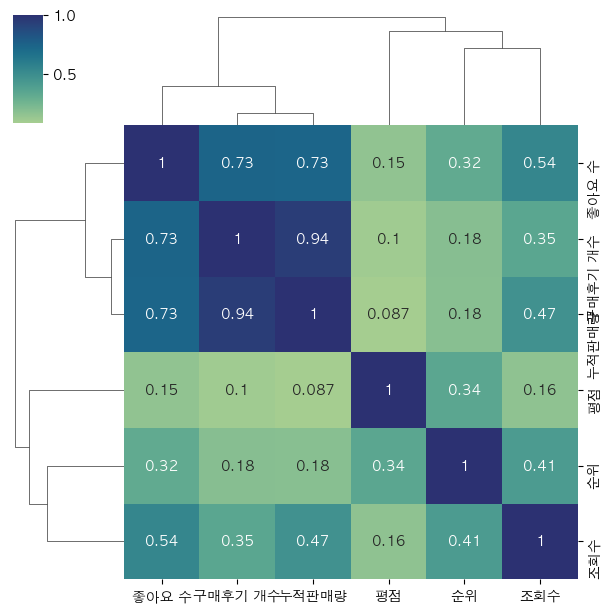

In [6]:
# 상관계수 그래프
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')

fig = sns.clustermap(df_corr,
              annot = True,
              cmap = 'crest',)
fig.fig.set_size_inches(6,6)

# 종속변수 = '누적판매량'

In [10]:
X = df[['평점', '조회수', '구매후기 개수','좋아요 수']]
y = df['누적판매량']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print('MSE',mse)
print('R-squared', r2)

MSE 5065.10096146943
R-squared 0.5925887840601495


In [7]:
df = df.drop('순위', axis=1)

In [8]:
df_corr = df.corr()
df_corr

,평점,구매후기 개수,좋아요 수,누적판매량,조회수
평점,1.000000,0.103811,0.152578,0.087305,0.158964
구매후기 개수,0.103811,1.000000,0.734451,0.940493,0.345860
좋아요 수,0.152578,0.734451,1.000000,0.731775,0.538768
누적판매량,0.087305,0.940493,0.731775,1.000000,0.469438
조회수,0.158964,0.345860,0.538768,0.469438,1.000000


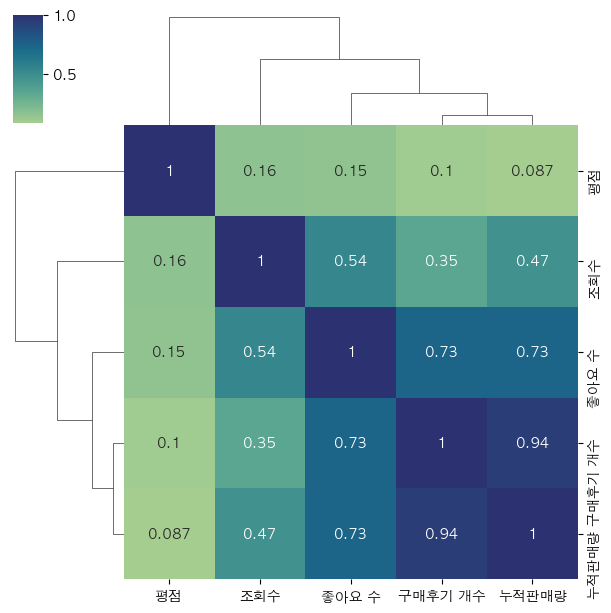

In [9]:
# 상관계수 그래프
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')

fig = sns.clustermap(df_corr,
              annot = True,
              cmap = 'crest',)
fig.fig.set_size_inches(6,6)